# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Исследование объявлений о продаже квартир

Имеем входной фрейм со следующими столбцами :  
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
    balcony — число балконов  
    ceiling_height — высота потолков (м)  
    cityCenters_nearest — расстояние до центра города (м)  
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
    first_day_exposition — дата публикации  
    floor — этаж  
    floors_total — всего этажей в доме  
    is_apartment — апартаменты (булев тип)  
    kitchen_area — площадь кухни в квадратных метрах (м²)  
    last_price — цена на момент снятия с публикации  
    living_area — жилая площадь в квадратных метрах(м²)  
    locality_name — название населённого пункта  
    open_plan — свободная планировка (булев тип)  
    parks_around3000 — число парков в радиусе 3 км  
    parks_nearest — расстояние до ближайшего парка (м)  
    ponds_around3000 — число водоёмов в радиусе 3 км  
    ponds_nearest — расстояние до ближайшего водоёма (м)  
    rooms — число комнат  
    studio — квартира-студия (булев тип)  
    total_area — площадь квартиры в квадратных метрах (м²)  
    total_images — число фотографий квартиры в объявлении  
  Для начал необходимо обработать пропуски в фрейме (заменить где это уместно, удалить если крайне необходимо, оставить как они есть) и изменить тип данных столбцов где это необходимо.  
  Добавить в таблицу :  
  1) цену за квадратный метр  
  2) день недели , меяц,год публикации   
  3) этаж квартиры; варианты — первый, последний, другой  
  4) соотношение жилой и общей площади, а также отношение площади кухни к общей  
Исследовать следующие параметры: площадь, цена, число комнат, высота потолков.    
Исследовать время продажи квартиры.  
Убрать выбивающиеся значения.  
Определить основные факторы влияющие на цену квартиры. 
Сделать выборку населенных пунктов с наибольшим количеством объявлений(топ 10), также провести исследование на основные ценовые факторы.  
Сделать выборку объявлений из Санкт-Петербурга, провести исследование зависимости цены от расстояния до центра.  
Сделать выборку объявлений находящихся в центре Санкт-Петербурга(для начала необходимо определить до какого километра считаем центром), провести исследование основных факторов влияющих на стоимость квартир.  
Написать общий вывод по проделанной работе.  






 
  

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep =  '\t')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Обилие пропущенных значений.
Для пропущенных значений:  
+1)Высота потолков - будем на среднее значение по России на данный момент (2,7 метра стандарт для новостроек).  
+2)Общее количество этажей - оставить без изменений (отсутствующих значений не так много, а угадать правильную этажность не вижу возможности).  
+3)Жилая площадь - при отсутсвтии данных по метражу жилой площади (скорее всего ее нет) относим лот к апартаментам и заменяем отсутсвие на 0.  
+4)Относится к апартаментам или нет - будет проводиться проверка как описано выше и заменяться на True, False.  
+5)Площадь кухни - нужно будет проверить студия или нет (если да то 0, в ином случе скореевсего возьмем среднюю площадь кухонь в зависимости от количесвто комнат в квартирах ).  
+6)Балконы - если нет данных скорее всего их просто нет в лоте (замена на 0).  
7)Название населенного пункта -  пропусков не много, но есть. Либо так и оставим, либо замена на неизвестно (более веротно).
8)Оставшиеся столбцы с расстояниями и количеством благ скорее всего не будут както изменены.(не вижу способов для их заполнения).   
Растояния скорее всего должны были заполняться автоматически, на основе картографических данных и именно в них огромное количество пропуков. Так себе похоже работает этот  автоматизированный процесс

Краткий план на обработку готов, поехали

### Шаг 2. Предобработка данных

Обработка столбца с высотой потолков

In [3]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.70)
df['ceiling_height'].isna().sum()

0

Замена пропусков метража жилой площади

In [4]:
df['living_area'] = df['living_area'].fillna(0)
df['living_area'].isna().sum()

0

Апартаменты - да или нет? 

In [5]:
df.loc[df['living_area'] == 0, 'is_apartment'] = True
df.loc[df['living_area'] != 0, 'is_apartment'] = False
#df['is_apartment'].isna().sum()

Теперь к кухне. Если квартира студия то площадь кухни примем как 0

In [6]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0
df['kitchen_area'].isna().sum()

2129

Избавиться от всех не получилось, заполним значения срединными значениями.

In [7]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].isna().sum()

0

 Кухни во всех квартирах однозначно разные (не считая вариантов, если они находяться в доме одного и того же типа и идентичного расположения.), но в дальнейшем нам эти данные понадобятся. Возьмем для заполнения не среднее значение, а срединное (при дальнейшем анализе таким образом меньше будет влиять на определение выброса)

А теперь к балконам

In [8]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Заменяем отсутствие названий населенного пункта на не указано

In [9]:
df['locality_name'] = df['locality_name'].fillna('Не указано')
df['locality_name'].isna().sum()

0

Заменим пропуски в количестве этажей на 0 для удобства обработки в последующих действиях

In [10]:
df['floors_total'] = df['floors_total'].fillna(0)
df['floors_total'].isna().sum()

0

Приведем столбцы к более удобным типам данных

In [11]:
df['balcony'] = df['balcony'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Заменили тип данных в столбце балконов на целочисленный (нет же понятия пол балкона),количество этажей также к целочисленным, привели столбец с первым днем размещения в вид даты врем. По хорошему еще поменять бы тип данных в количестве парков, водоемов, но по ним нет данных возможно их просто нет и надо бы заменить их на 0, но пока что не уверен. Изменить  формат количества дней до продажи тоже бы в целочисленные перегнать , но опять же нужно заменить пропущенные значения, чем не понятно среднее брать - маразмом страдать, нулями тоже не заполнить

### Шаг 3. Посчитайте и добавьте в таблицу

Для начала добавим столбцы с днем недели, месяцем и годом публикации объявления

In [12]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,0.0,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018


Цена за квадрат

In [13]:
df['cost_per'] = df['last_price'] / df['total_area']
#print(df['cost_per'])

Этаж (Первый, последний, другой), для тех лотов где не указано количество этажей сделаем так чтобы показывало 'Другой'. Для этого создадим функцию и применим его

In [14]:
def categorize_floor(row):
           
    floors_total = row['floors_total']
    floor_current = row['floor']
   
    if floor_current == 1:
        return 'Первый'
    elif floor_current == floors_total:
        return 'Последний'
    else:
        return 'Другой'

In [15]:
df['floor_ind'] = df.apply(categorize_floor, axis =1)
#print(df['floor_ind'])

Создадим и заполним столбцы с отношением кухонной площади и жилой к общей

In [16]:
df['attitude_live']= df['living_area'] / df['total_area']
df['attitude_kitchen']= df['kitchen_area'] / df['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков. Количество корзин для начала будем брать 100, а range  как максимальное и  минимальное значение (в последствии будем изменять с учетом выбросов)

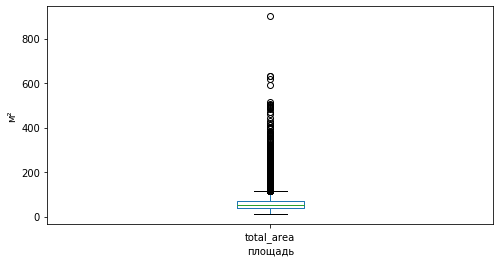

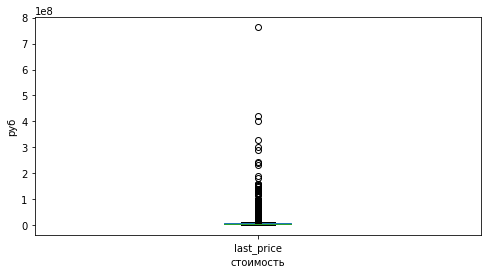

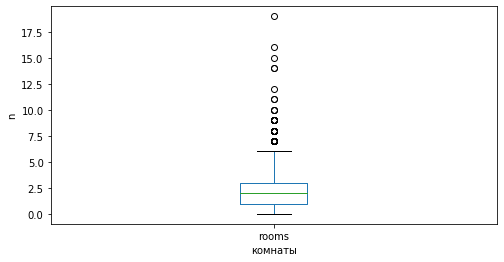

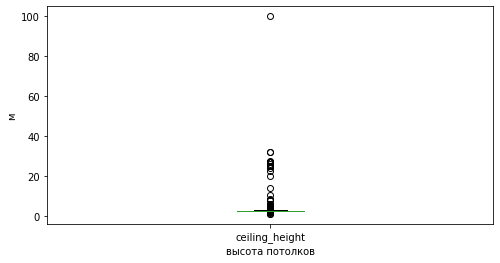

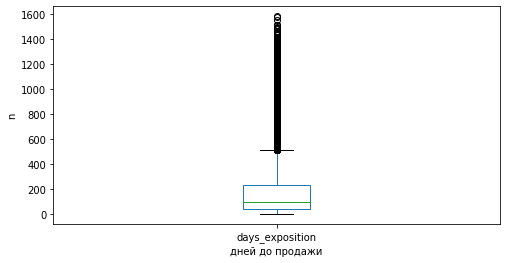

In [17]:
some_dict = {'total_area': ['площадь', 'м²'],
            'last_price' : ['стоимость','руб'],
            'rooms': ['комнаты','n'],
            'ceiling_height':['высота потолков','м'],
            'days_exposition':['дней до продажи','n']}

for key in some_dict.keys():
    fig = plt.figure(figsize = (8,4))
    plt.xlabel(some_dict[key][0])
    plt.ylabel(some_dict[key][1])
    df[key].plot.box(subplots=False,sharex=False,sharey=False)

In [18]:
#print(df['total_area'].max())
#print(df['total_area'].min())
#pd.Series(df['total_area']).hist(bins = 100, range = (12,400))

Найдем выбросы и уберем их, воспользуемся расчетом  медианы+4*IQR. Для этого напишем функцию.

In [19]:
def top_border_found(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    border = data[column].median() + 4*IQR
    return border
def bot_border_found(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    border = data[column].median() - 4*IQR
    return border

In [20]:
drop_area_top = top_border_found(df,'total_area')
drop_area_bot = bot_border_found(df,'total_area')
drop_price_top = top_border_found(df,'last_price')
drop_price_bot = bot_border_found(df,'last_price')
drop_rooms_top = top_border_found(df,'rooms')
drop_rooms_bot = bot_border_found(df,'rooms')
drop_height_top = top_border_found(df,'ceiling_height')
drop_height_bot = bot_border_found(df,'ceiling_height')
drop_days_top =  top_border_found(df,'days_exposition')
drop_days_bot = bot_border_found(df,'days_exposition')

Построим гистограммы для каждого интересующего нас столбца

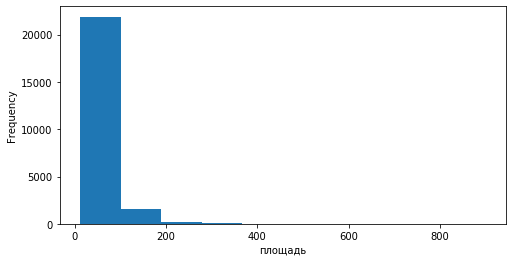

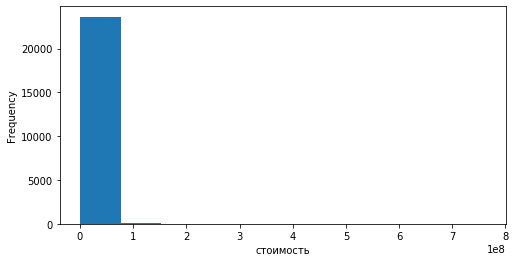

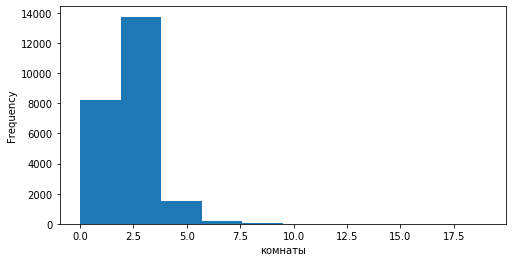

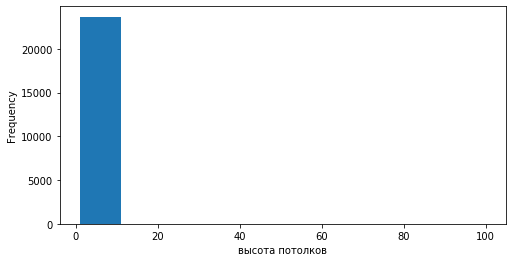

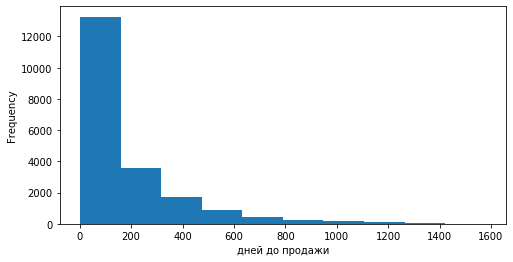

In [21]:
for key in some_dict.keys():
    fig = plt.figure(figsize = (8,4))
    plt.xlabel(some_dict[key][0])
    df[key].plot(kind='hist',subplots=False,sharex=False,sharey=False)

Уберем выбросы из нашего фрейма

In [27]:
df = df.query('@drop_days_bot < days_exposition < @drop_days_top & @drop_height_bot < ceiling_height < @drop_height_top  &  @drop_rooms_bot < rooms < @drop_rooms_top  &  @drop_price_bot < last_price < @drop_price_top & @drop_area_bot < total_area < @drop_area_top')
   # .query('days_exposition < 232')
    #.query('ceiling_height > 2,5 & ceiling_height < 4')
    #.query('rooms < 7')
    #.query('last_price > 1000000 & last_price < 800000000')
    #.query('total_area > 25 & total_area < 101')
#)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18673 entries, 1 to 23697
Data columns (total 29 columns):
total_images            18673 non-null int64
last_price              18673 non-null int64
total_area              18673 non-null float64
first_day_exposition    18673 non-null datetime64[ns]
rooms                   18673 non-null int64
ceiling_height          18673 non-null float64
floors_total            18673 non-null int64
living_area             18673 non-null float64
floor                   18673 non-null int64
is_apartment            18673 non-null bool
studio                  18673 non-null bool
open_plan               18673 non-null bool
kitchen_area            18673 non-null float64
balcony                 18673 non-null int64
locality_name           18673 non-null object
airports_nearest        14160 non-null float64
cityCenters_nearest     14176 non-null float64
parks_around3000        14176 non-null float64
parks_nearest           5820 non-null float64
ponds_around30

### Поправлено  
Отброшены выбросы (по принципу медиана + 4 * IQR )

Посмотрим зависимость цены  от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также зависимость от даты размещения: дня недели, месяца и года. Для наглядности будем строить графики

0.7543951007271855


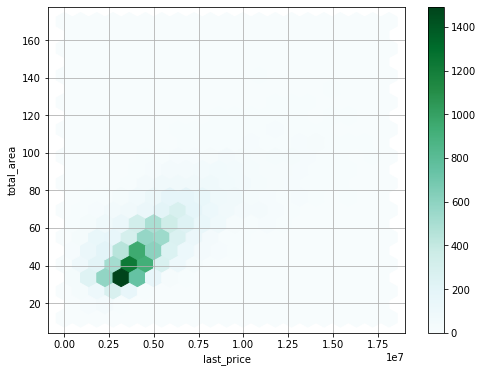

In [28]:
df.plot(x = 'last_price', y = 'total_area',kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print(df['last_price'].corr(df['total_area']))

+-  с графика видно, что при увеличении площади увеличивается и цена квартиры. Коэффициент корреляции почти 0,6 и если я правильно понимаю как он работает это значит, что связь есть (я так подозревая что зря я  по отдельности взял , но не удалять же, построим матрицы рассеяния для интересующих нас величин, заранее создадим новую таблицу включающую только интересующие нас столбцы)

In [29]:
df1 = df[['last_price', 'total_area','ceiling_height', 'rooms', 'cityCenters_nearest' ]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb26f085c0>,
      dtype=object)

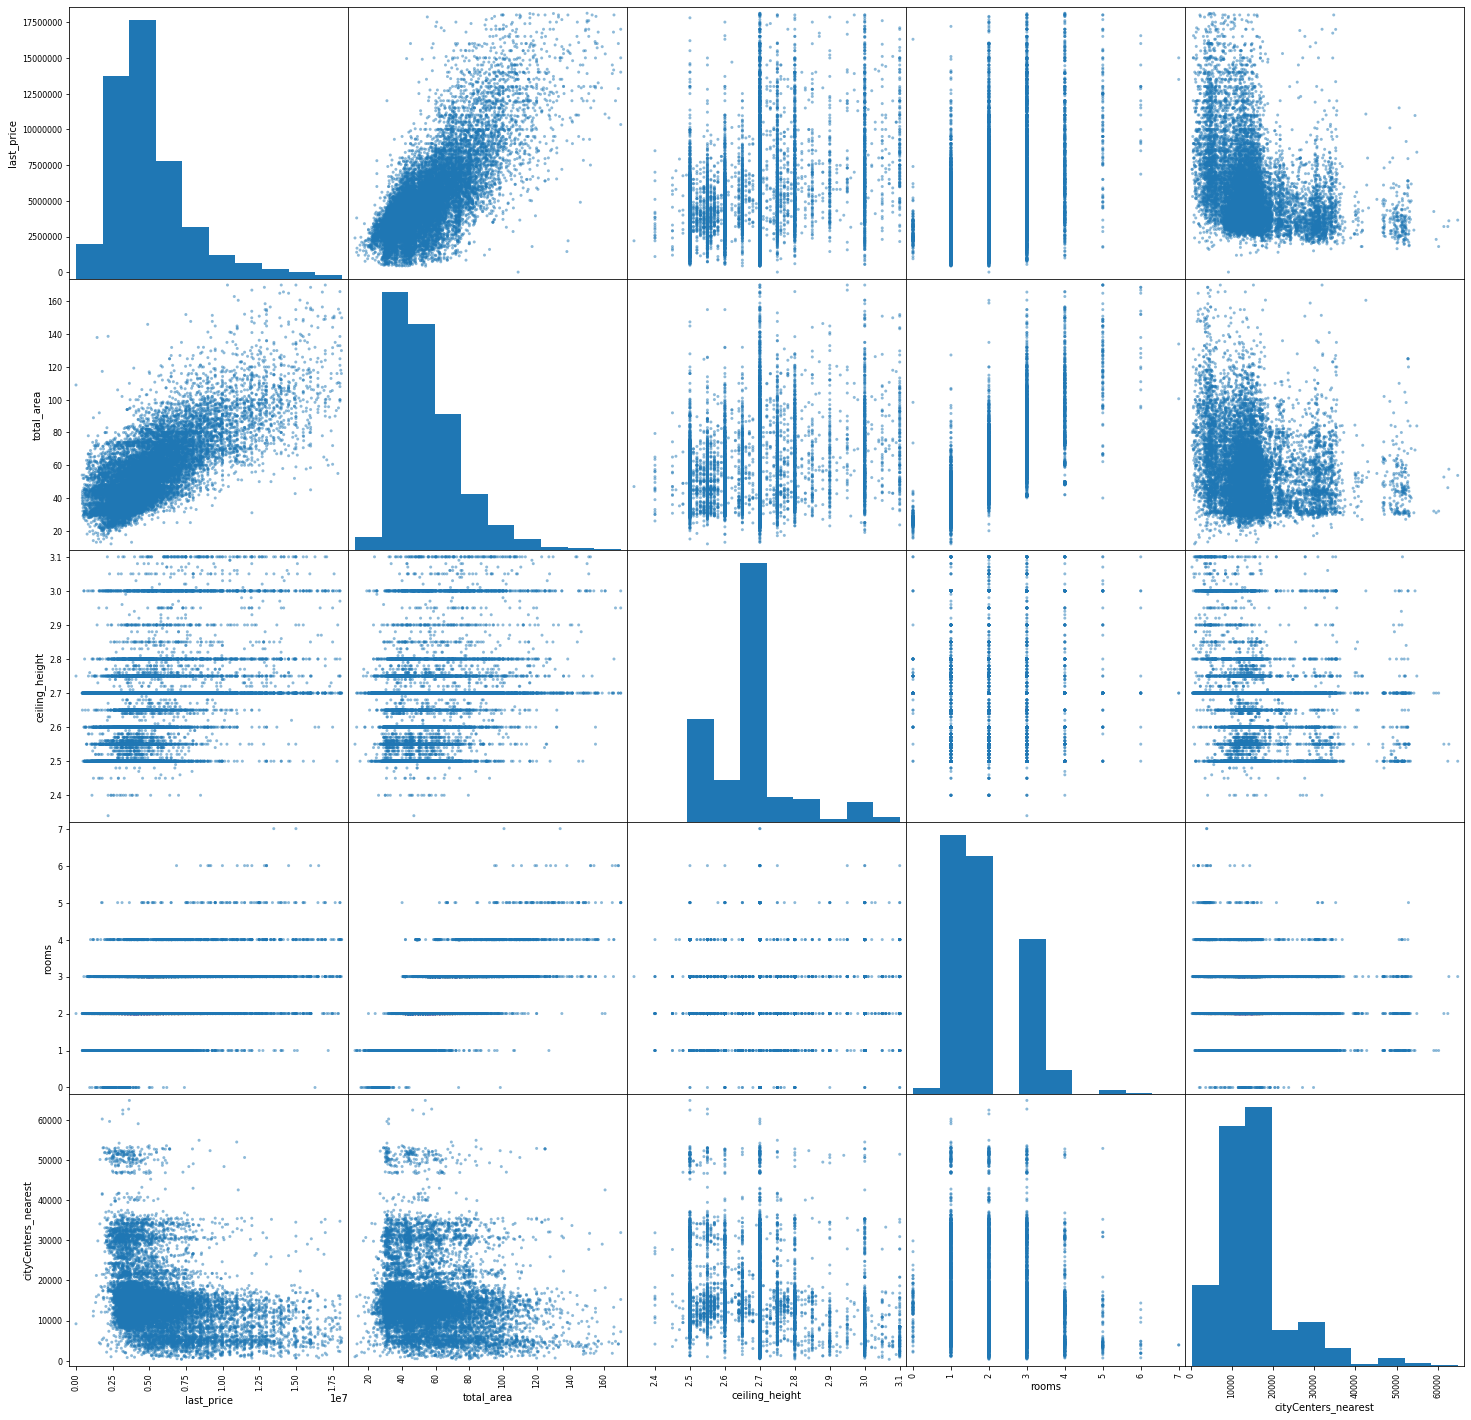

In [30]:
pd.plotting.scatter_matrix(df1, figsize = (25,25))

In [31]:
print(df1.corr())

                     last_price  total_area  ceiling_height     rooms  \
last_price             1.000000    0.754395        0.333064  0.478227   
total_area             0.754395    1.000000        0.250953  0.798416   
ceiling_height         0.333064    0.250953        1.000000  0.043045   
rooms                  0.478227    0.798416        0.043045  1.000000   
cityCenters_nearest   -0.329011   -0.150953       -0.192956 -0.095920   

                     cityCenters_nearest  
last_price                     -0.329011  
total_area                     -0.150953  
ceiling_height                 -0.192956  
rooms                          -0.095920  
cityCenters_nearest             1.000000  


С графиков как и в предыдущий раз видно отсутсвие / наличие зависимости , но не очень отчетливо. Для лучшего восприятия были найдены коэффициенты корреляции. Получили, что все таки самая большая и очевидная зависимость это величина цены от общей площади квартир (все таки платят всегда за метры), и чем меньше расстояние до центра цена так же растет. Посмотрим теперь как обстоят дела с днем недели месяцем и годом.

In [32]:
df2 = df[['last_price','weekday', 'month', 'year']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb24a01e80>,
      dtype=object)

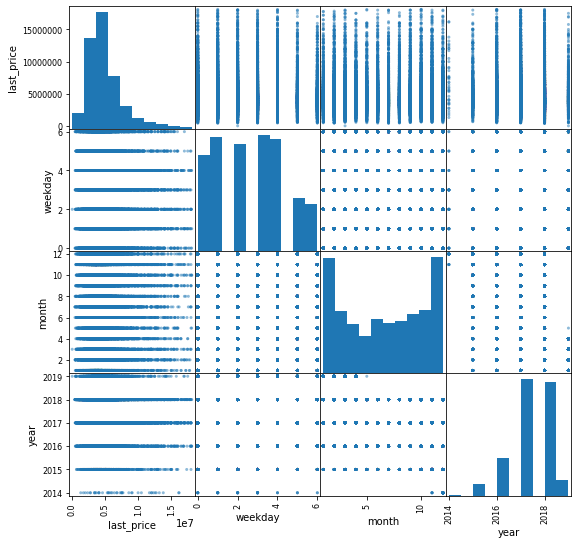

In [33]:
pd.plotting.scatter_matrix(df2, figsize = (9,9))

In [34]:
print(df2.corr())

            last_price   weekday     month      year
last_price    1.000000 -0.011002  0.009319 -0.030283
weekday      -0.011002  1.000000  0.010303  0.002380
month         0.009319  0.010303  1.000000 -0.208871
year         -0.030283  0.002380 -0.208871  1.000000


Ни из графиков, ни коэффициентов не просматривается зависимость цены от временных параметров, возможно если брать определенный сегмент квартир (в меньшем диапазоне цены) она бы и наблюдалась

Создадим фрейм топ 10 по объявлениям по продажам, посчитаем среднюю цену в каждом городе.


In [35]:
df3 = df.groupby('locality_name').count()
df3 = df3.sort_values(by = 'total_images', ascending = False)
df3.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,cost_per,floor_ind,attitude_live,attitude_kitchen
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,12051,12051,12051,12051,12051,12051,12051,12051,12051,12051,...,12035,5828,12051,12051,12051,12051,12051,12051,12051,12051
посёлок Мурино,504,504,504,504,504,504,504,504,504,504,...,0,0,504,504,504,504,504,504,504,504
посёлок Шушары,401,401,401,401,401,401,401,401,401,401,...,397,138,401,401,401,401,401,401,401,401
Всеволожск,326,326,326,326,326,326,326,326,326,326,...,0,0,326,326,326,326,326,326,326,326
посёлок Парголово,297,297,297,297,297,297,297,297,297,297,...,297,51,297,297,297,297,297,297,297,297
Колпино,296,296,296,296,296,296,296,296,296,296,...,295,159,296,296,296,296,296,296,296,296
деревня Кудрово,290,290,290,290,290,290,290,290,290,290,...,0,0,290,290,290,290,290,290,290,290
Пушкин,282,282,282,282,282,282,282,282,282,282,...,282,138,282,282,282,282,282,282,282,282
Гатчина,257,257,257,257,257,257,257,257,257,257,...,0,0,257,257,257,257,257,257,257,257


In [36]:
top_10_list = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'посёлок Парголово', 'деревня Кудрово', 'Колпино', 'Гатчина', 'Пушкин','Выборг']
df_top_10 = df.query('locality_name in @top_10_list')
print(df_top_10['locality_name'].unique())
df_top_10.head(5)

['посёлок Шушары' 'Санкт-Петербург' 'посёлок Парголово' 'посёлок Мурино'
 'Пушкин' 'деревня Кудрово' 'Колпино' 'Гатчина' 'Выборг' 'Всеволожск']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,cost_per,floor_ind,attitude_live,attitude_kitchen
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.60,1,False,...,0.0,NaN,81.0,1,12,2018,82920.792079,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,2.0,574.0,558.0,3,8,2015,92785.714286,Другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,1,6,2018,100000.000000,Другой,0.320000,0.410000
6,6,3700000,37.30,2017-11-02,1,2.70,26,10.60,6,False,...,0.0,NaN,155.0,3,11,2017,99195.710456,Другой,0.284182,0.386059
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,NaN,NaN,189.0,2,5,2018,87454.764777,Другой,0.465320,0.265682


In [37]:
stat_city_price = df_top_10.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean'])

In [38]:
stat_city_met = df_top_10.pivot_table(index='locality_name', values = 'total_area', aggfunc=['count', 'mean'])
stat_fin = stat_city_met.join(stat_city_price)
stat_fin.columns = ['count','total_area','count_price','cost']
stat_fin['cost_per_met'] = stat_fin['cost']/stat_fin['total_area']
stat_fin = stat_fin.sort_values(by = 'cost_per_met', ascending = False)
stat_fin
print('Самые дорогие квартиры в :',stat_fin.index.values[0])
print('Самые дешевые квартиры в :',stat_fin.index.values[9])
#max = stat_fin['cost'].max()
#min = stat_fin['cost'].min()


Самые дорогие квартиры в : Санкт-Петербург
Самые дешевые квартиры в : Выборг


In [39]:
stat_fin

,count,total_area,count_price,cost,cost_per_met
locality_name,,,,,
Санкт-Петербург,12051,55.777833,12051,5.902624e+06,105823.828432
Пушкин,282,55.223298,282,5.575994e+06,100971.771216
деревня Кудрово,290,46.713897,290,4.247191e+06,90919.218087
посёлок Парголово,297,50.320707,297,4.384288e+06,87126.910490
посёлок Мурино,504,43.869683,504,3.661477e+06,83462.585797
посёлок Шушары,401,53.662120,401,4.053643e+06,75540.118670
Колпино,296,51.420676,296,3.765592e+06,73231.088425
Гатчина,257,50.010973,257,3.360249e+06,67190.239963
Всеволожск,326,54.751871,326,3.620060e+06,66117.554433


Самый 'дешевый' и 'дорогой' города мы нашли, теперь перейдем непосредственно к Санкт-Петербургу. В столбце с растояниями до центра 14 значений из 7628 не заполнены заменим их на 0 (это меньше 0,2 % всех данных, их замена не внесет сильных изменений)

In [40]:
df_peter = df.query('locality_name == "Санкт-Петербург"')
df_peter = df_peter.fillna(0)
#df_peter.head(5)
df_peter['range_in_km']= df_peter['cityCenters_nearest'] / 1000
df_peter['range_in_km'] = round(df_peter['range_in_km'])
df_peter['range_in_km'] = df_peter['range_in_km'].astype('int')
df_peter['range_in_km'].head(10)
#df['locality_name'].unique()

2     14
4      8
9     15
10    14
15    14
16    11
17    15
18    11
19    13
21    10
Name: range_in_km, dtype: int64

Считаем среднее для каждого километра при помощи pivot_table, цену для лучшего визуального восприятия переведем в миллионы

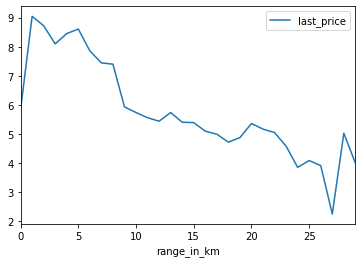

In [41]:
df_peter_pv = df_peter.pivot_table(index='range_in_km', values = 'last_price', aggfunc = 'mean')
df_peter_pv['last_price'] = df_peter_pv['last_price'] / 1000000
df_peter_pv.plot()


Цена сильно падает в 1-й раз в районе 10 км (от совсем близких к центру на 1,5 млн ( на 25 - 30%), будем считать что центр - в радиусе 10 км . Теперь проведем действия, что и раньше только относительно квартир попавших в радиус 10 км

In [42]:
df_peter_centr = df_peter.query('range_in_km < 10')
df_petr_near = df_peter.query('range_in_km >= 10')
#df_peter_centr.info()


In [43]:
df_peter_centr.mean()

total_images           9.283951e+00
last_price             7.709019e+06
total_area             6.577614e+01
rooms                  2.254902e+00
ceiling_height         2.755381e+00
floors_total           8.638707e+00
living_area            3.491123e+01
floor                  4.830065e+00
is_apartment           8.424110e-02
studio                 5.446623e-03
open_plan              2.178649e-03
kitchen_area           1.112253e+01
balcony                4.114016e-01
airports_nearest       2.603600e+04
cityCenters_nearest    5.972868e+03
parks_around3000       8.297023e-01
parks_nearest          2.924688e+02
ponds_around3000       1.124183e+00
ponds_nearest          3.199775e+02
days_exposition        1.781245e+02
weekday                2.576979e+00
month                  6.571532e+00
year                   2.017179e+03
cost_per               1.196779e+05
attitude_live          5.237093e-01
attitude_kitchen       1.819268e-01
range_in_km            5.920479e+00
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb23ca0be0>,
      dtype=object)

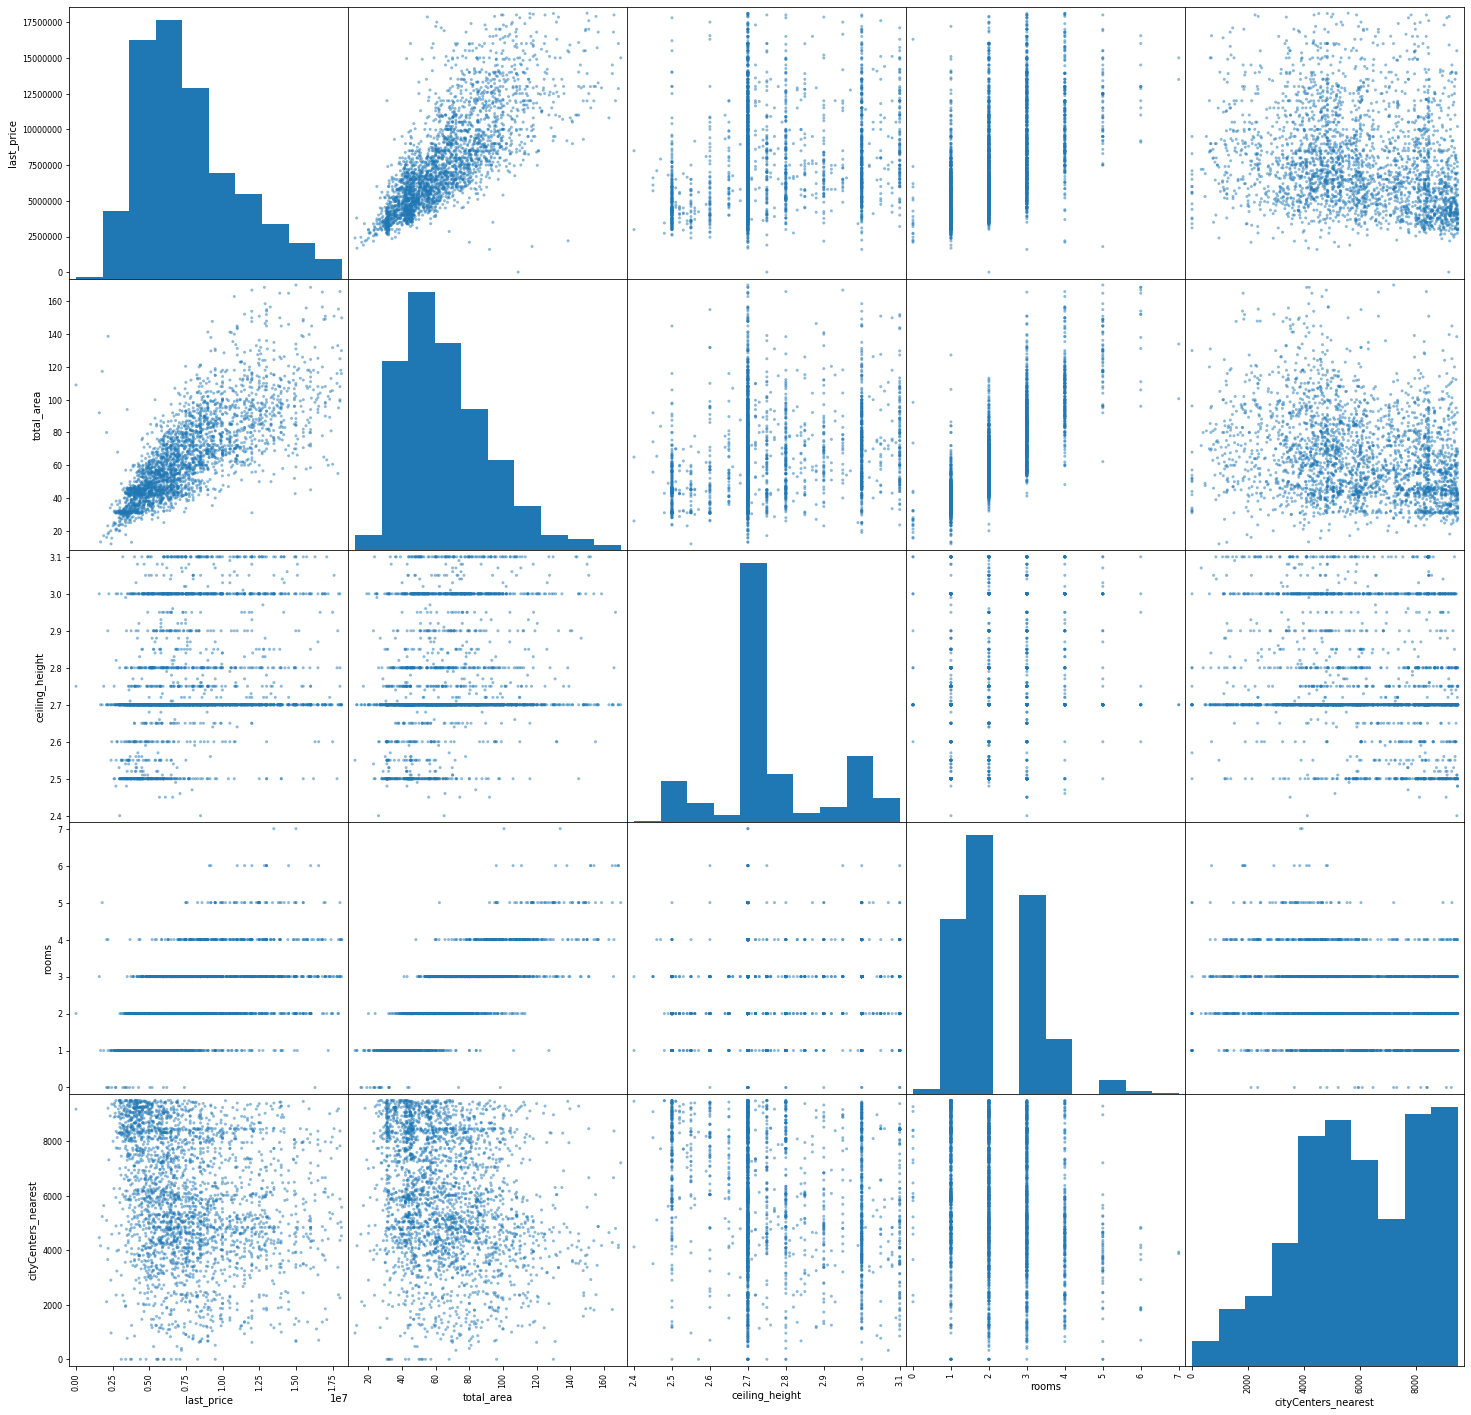

In [44]:
df_peter_centr_1 = df_peter_centr[['last_price', 'total_area','ceiling_height', 'rooms', 'cityCenters_nearest' ]]
pd.plotting.scatter_matrix(df_peter_centr_1, figsize = (25,25))

In [45]:
print(df_peter_centr_1.corr())

                     last_price  total_area  ceiling_height     rooms  \
last_price             1.000000    0.759458        0.227172  0.510339   
total_area             0.759458    1.000000        0.214183  0.810862   
ceiling_height         0.227172    0.214183        1.000000  0.141772   
rooms                  0.510339    0.810862        0.141772  1.000000   
cityCenters_nearest   -0.222947   -0.247034       -0.172159 -0.229452   

                     cityCenters_nearest  
last_price                     -0.222947  
total_area                     -0.247034  
ceiling_height                 -0.172159  
rooms                          -0.229452  
cityCenters_nearest             1.000000  


В центре цены за квартиру как и сама площадь этих квартир чуть выше (около 10% ). Сами квартиры больше и цена за квадрат не сильно увеличилась.

Для наглядности отличия квартир в центре от других построим график зависимости стоимости за квадратный метр от расстояния до центра.

Text(0, 0.5, 'Цена за квадратный метр')

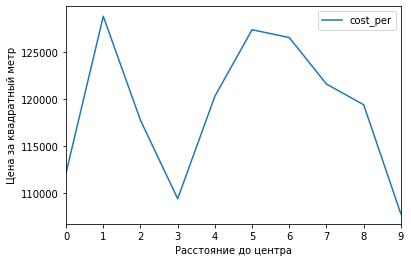

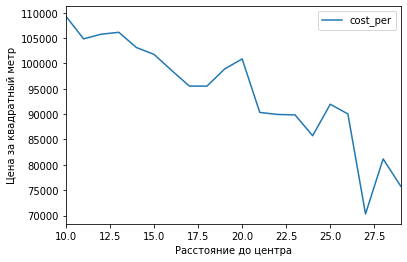

In [56]:
df_peter_in_centr = df_peter_centr.pivot_table(index='range_in_km', values = 'cost_per', aggfunc = 'mean')
df_peter_near_centr = df_petr_near.pivot_table(index='range_in_km', values = 'cost_per', aggfunc = 'mean')
df_peter_in_centr.plot()
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена за квадратный метр')
df_peter_near_centr.plot()
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена за квадратный метр')

Из графиков видно, что с увеличением  расстояния до центра стоимость за квадратный метр квартиры уменьшается.

### Шаг 5. Общий вывод

Был изучен и обработан входящий фрейм. Отсутствующие данные в столбцах содержащие в себе высоту потолков и площадь кухни были заменены. Огромное количество пропусков находится в столбцах которые должны были заполнены автоматически(с расстояниями до точек) судя по всему система не исправна от слова совсем. В столбцах содержащие в себе целочисленные значения тип данных был заменен на integer.    
Были посчитаны и добавлены в инзначальный фрейм : цена за квадратный метр, день недели, месяц , год публикации, этаж квартиры, соотношения жилой площади и площади кухни к общей.   
Были рассмотрены следующие параметры влияющие на стоимость квартиры для изначальных данных :площадь, цена, число комнат, высота потолков, время продажи квартиры. Из всех этих параметров явно на итоговую цену квартиры влияет площадь лота.  
Выделили лоты продающиеся непосредственно в Санкт-Петербурге, выделена граница центральной части город(резкий скачок стоимости), зависимость стоимости для основных параметров  не изменилась (по прежнему цена сильно зависела от метража квартиры). Т.к. был рассмотрен непосредственно один город  построили графики зависимости стоимости за квадратный метр от расстояния до центра (для наглядности где проходит граница этого центра их построено 2). Из них видно чем дальше от цетнра - тем ниже стоимость
        
          